# INTRODUCTION
The IPL match prediction. Based on some match stats, we’re predicting who is the winner of an IPL match. In this project we will find the winning team using machine learning and created the prediction model for the future matches.

# IPL Match Prediction

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import sklearn

In [22]:
data = pd.read_csv("matches.csv")

ANALYZING DATA ROWS

In [23]:
data.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


SUMMARY OF IPL DATA SET

In [24]:
data.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [25]:
data.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

REMOVING NULL VALUES

In [26]:
data = data.iloc[:,:-1]
data.dropna(inplace=True)

In [27]:
data["team1"].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Delhi Daredevils',
       'Kings XI Punjab', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants', 'Delhi Capitals'], dtype=object)


# Visualizations



Text(0.5, 1.0, 'Number of  IPL  matches won by each team')

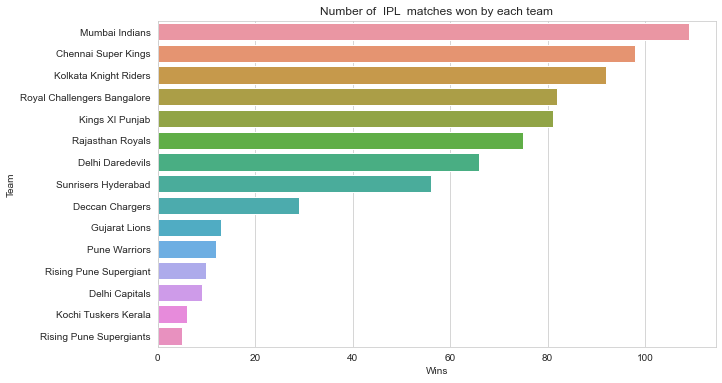

In [28]:
plt.figure(figsize = (10,6))
sns.countplot(y = 'winner',data = data,order= data['winner'].value_counts().index)
plt.xlabel('Wins')
plt.ylabel('Team')
plt.title('Number of  IPL  matches won by each team')# 

Text(0.5, 1.0, 'Toss Decision')

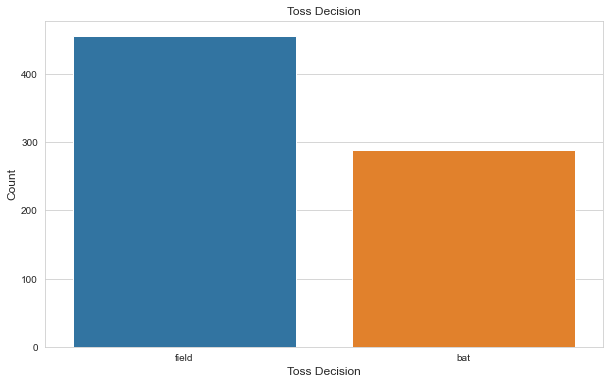

In [29]:
plt.figure(figsize = (10,6))
sns.countplot(x = "toss_decision", data=data)
plt.xlabel('Toss Decision',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Toss Decision')

# UNIQUE VALUES

In [30]:
x= ["city", "toss_decision", "result", "dl_applied"]
for i in x:
  print(data[i].unique())
  print(data[i].value_counts())

['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Mumbai' 'Kolkata' 'Bangalore'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' 'Mohali'
 'Bengaluru']
Mumbai            101
Kolkata            77
Delhi              73
Hyderabad          64
Bangalore          63
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          13
Centurion          12
Ahmedabad          12
Visakhapatnam      12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cuttack             7
Ranchi              7
Port Elizabeth      7
Cape Town           7
Abu Dhabi           7
Sharjah             6
Raipur              6
Kochi               5
Kanpur              4
Nagpur              3
Kim

In [31]:
x= data.drop(["winner"], axis=1)
y = data["winner"]

In [32]:
data.drop(["id", "Season","city","date", "player_of_match", 'umpire1', "venue", "umpire2"], axis=1, inplace=True)

In [33]:
x = data.drop(["winner"], axis=1)
y = data["winner"]

In [34]:
x= pd.get_dummies(x, ["team1","team2", "toss_winner", "toss_decision", "result"], drop_first = True)

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

# MODEL CREATION AND EVALUATION

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200,min_samples_split=3,max_features = "auto")

In [38]:
model.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=3, n_estimators=200)

In [39]:
y_pred = model.predict(x_test)

In [40]:
import csv
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_pred, y_test)
print(ac)
final=pd.DataFrame(y_pred)
final.to_csv('http://localhost:8888/tree/ed%20project/final.csv')


0.8993288590604027


# SAVING THE FILE AS PICKLE FOR DEPLOYMENT

In [44]:
import pickle as pk
with open("data.pkl", "wb") as f:
    pk.dump(final,f)

In [42]:
data.info

<bound method DataFrame.info of                       team1                        team2  \
0       Sunrisers Hyderabad  Royal Challengers Bangalore   
1            Mumbai Indians       Rising Pune Supergiant   
2             Gujarat Lions        Kolkata Knight Riders   
3    Rising Pune Supergiant              Kings XI Punjab   
5             Gujarat Lions          Sunrisers Hyderabad   
..                      ...                          ...   
750     Chennai Super Kings              Kings XI Punjab   
751   Kolkata Knight Riders               Mumbai Indians   
752     Chennai Super Kings               Mumbai Indians   
754          Delhi Capitals          Chennai Super Kings   
755          Mumbai Indians          Chennai Super Kings   

                     toss_winner toss_decision  result  dl_applied  \
0    Royal Challengers Bangalore         field  normal           0   
1         Rising Pune Supergiant         field  normal           0   
2          Kolkata Knight Riders     

Note: you may need to restart the kernel to use updated packages.


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3452: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
